<a href="https://colab.research.google.com/github/SMRUTHIRAJAN/T.-SAI-SMRUTHI-/blob/main/CA_2_Q2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [2]:
data = load_iris()

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
x = data.data
y = data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(120, 4)

In [8]:
X_test.shape

(30, 4)

In [9]:
y_train.shape

(120,)

In [10]:
y_test.shape

(30,)

In [11]:
iris_class = ['0-setosa', '1-versicolor', '2-virginica']

In [12]:
model = keras.Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, batch_size=5, epochs=100, validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 2s 15ms/step - loss: 1.0595 - accuracy: 0.3646 - val_loss: 1.0987 - val_accuracy: 0.2083
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0351 - accuracy: 0.3646 - val_loss: 1.0774 - val_accuracy: 0.2500
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.0132 - accuracy: 0.3958 - val_loss: 1.0542 - val_accuracy: 0.2500
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9784 - accuracy: 0.5729 - val_loss: 0.9886 - val_accuracy: 0.7917
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9223 - accuracy: 0.8229 - val_loss: 0.9060 - val_accuracy: 0.8333
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.8675 - accuracy: 0.6979 - val_loss: 0.8550 - val_accuracy: 0.7500
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8171 - accuracy: 0.8438 - val_loss: 0.8159 - val_accuracy: 0.9583
Epoch 8/100


In [15]:
loss, ac = model.evaluate(X_test, y_test)
print(f"Accuracy: {ac}")

1/1 [==============================] - 0s 38ms/step - loss: 0.1212 - accuracy: 0.9333
Accuracy: 0.9333333373069763


In [16]:
y_pred = model.predict(X_test)
y_pred[:5]

1/1 [==============================] - 0s 90ms/step


array([[1.1854566e-03, 9.6841210e-01, 3.0402338e-02],
       [9.9870157e-01, 1.2984069e-03, 1.8156854e-09],
       [3.7605776e-09, 3.6937445e-03, 9.9630630e-01],
       [5.5628229e-04, 9.0087235e-01, 9.8571338e-02],
       [2.6060949e-04, 9.2393082e-01, 7.5808592e-02]], dtype=float32)

In [17]:
import numpy as np

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 0, 2, 1, 1]

In [19]:
y_test[:5]

array([1, 0, 2, 1, 1])

In [20]:
y_test[3]

1

In [21]:
iris_class[y_classes[3]]

'1-versicolor'

In [22]:
y_test[11]

0

In [23]:
iris_class[y_classes[11]]

'0-setosa'

Prediction is accurate thus our model works well

Q3

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [25]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
X_test.shape

(10000, 32, 32, 3)

In [28]:
y_train.shape

(50000, 1)

In [29]:
y_test.shape

(10000, 1)

In [30]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [31]:
y_train = y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [32]:
y_test = y_test.reshape(-1,)

In [33]:
image_class = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(image_class[y[index]])

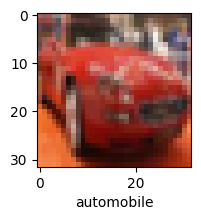

In [35]:
plot_sample(X_train, y_train, 5)

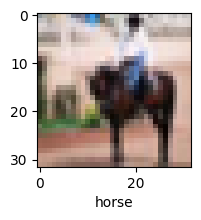

In [36]:
plot_sample(X_train, y_train, 11)

In [51]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [52]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 148s 94ms/step - loss: 2.3008 - accuracy: 0.1238
Epoch 2/5
1563/1563 [==============================] - 158s 101ms/step - loss: 2.2997 - accuracy: 0.1281
Epoch 3/5
1563/1563 [==============================] - 147s 94ms/step - loss: 2.2988 - accuracy: 0.1349
Epoch 4/5
1563/1563 [==============================] - 148s 94ms/step - loss: 2.2980 - accuracy: 0.1454
Epoch 5/5
1563/1563 [==============================] - 148s 95ms/step - loss: 2.2969 - accuracy: 0.1532


In [53]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 33ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.12      0.96      0.21      1000
           1       0.32      0.04      0.07      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.23      0.40      0.29      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.14     10000
   macro avg       0.07      0.14      0.06     10000
weighted avg       0.07      0.14      0.06     10000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [55]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 2.3028 - accuracy: 0.0992
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 2.3027 - accuracy: 0.0996
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3027 - accuracy: 0.1015
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 2.3028 - accuracy: 0.0969
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [57]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302633285522461, 0.10000000149011612]

In [58]:
y_pred = cnn.predict(X_test)
y_pred[1:4]

313/313 [==============================] - 4s 13ms/step


array([[0.10152572, 0.10094201, 0.09935885, 0.10068708, 0.09872921,
        0.09931707, 0.0989292 , 0.10133474, 0.09931784, 0.09985832],
       [0.10152572, 0.10094201, 0.09935885, 0.10068708, 0.09872921,
        0.09931707, 0.0989292 , 0.10133474, 0.09931784, 0.09985832],
       [0.10152572, 0.10094201, 0.09935885, 0.10068708, 0.09872921,
        0.09931707, 0.0989292 , 0.10133474, 0.09931784, 0.09985832]],
      dtype=float32)

In [59]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[1:4]

[0, 0, 0]

In [60]:
y_test[1:4]

array([8, 8, 0], dtype=uint8)

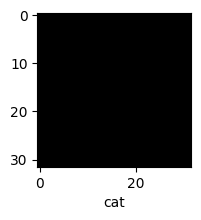

In [66]:
plot_sample(X_test, y_test,8)

In [62]:
image_class[y_classes[8]]

'airplane'

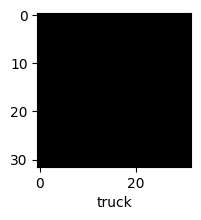

In [67]:
plot_sample(X_test, y_test,28)

In [64]:
image_class[y_classes[28]]

'airplane'